<a href="https://colab.research.google.com/github/tiadwi/Data-Science-Nanodegree/blob/main/Udacity_Submission_1_Diamonds_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATASET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# EDA

## Handling Missing Value

In [5]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [6]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [7]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Handling Outliers

In [9]:
# Custom palette for visualization
sns.set_style("darkgrid", {"axesfacecolor": ".9"})
sns.set_context("talk", font_scale = .7)

<Axes: xlabel='carat'>

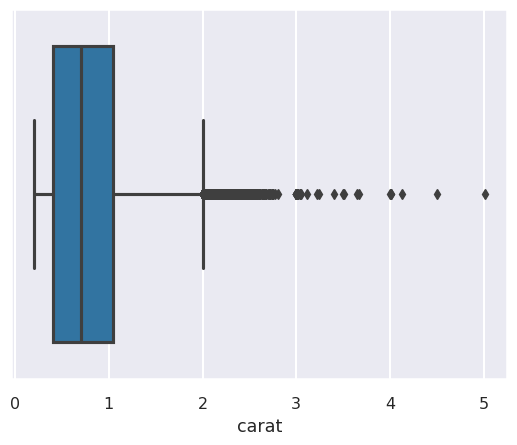

In [10]:
sns.boxplot(x=diamonds['carat'])

<Axes: xlabel='table'>

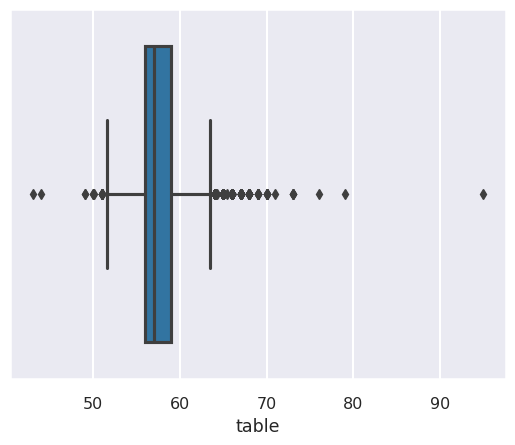

In [11]:
sns.boxplot(x=diamonds['table'])

<Axes: xlabel='x'>

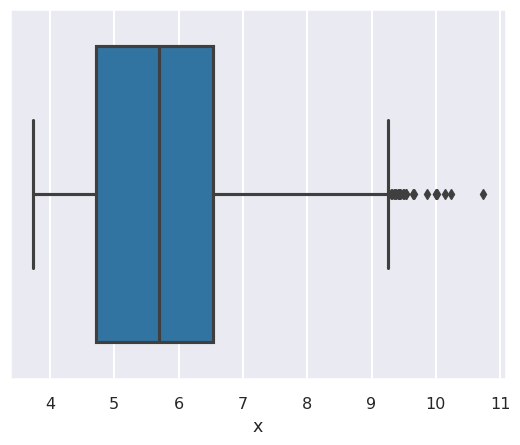

In [12]:
sns.boxplot(x=diamonds['x'])

In [13]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]

# Check data size after we drop the outliers
diamonds.shape

<ipython-input-13-7e49840cb187>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
<ipython-input-13-7e49840cb187>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
<ipython-input-13-7e49840cb187>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


(47524, 10)

## Univariate Analysis

In [14]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

### Categorical Features

           numbers of sample  persentaspercentagee
Ideal                  20340                  42.8
Premium                12115                  25.5
Very Good              10994                  23.1
Good                    3745                   7.9
Fair                     330                   0.7


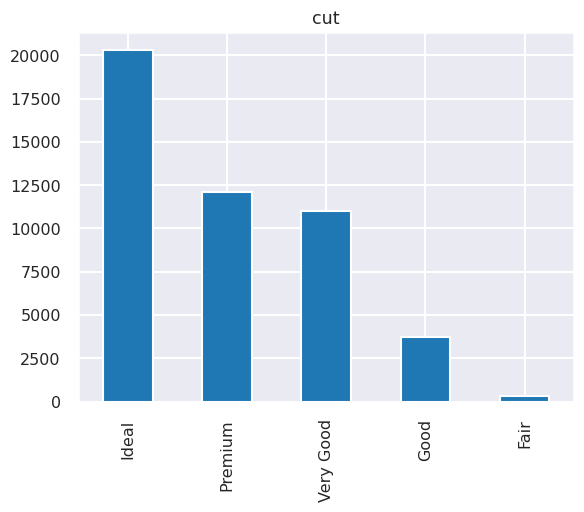

In [15]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'numbers of sample':count, 'persentaspercentagee':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   number of sample  percentage
G             10081        21.2
E              8910        18.7
F              8466        17.8
H              7176        15.1
D              6195        13.0
I              4462         9.4
J              2234         4.7


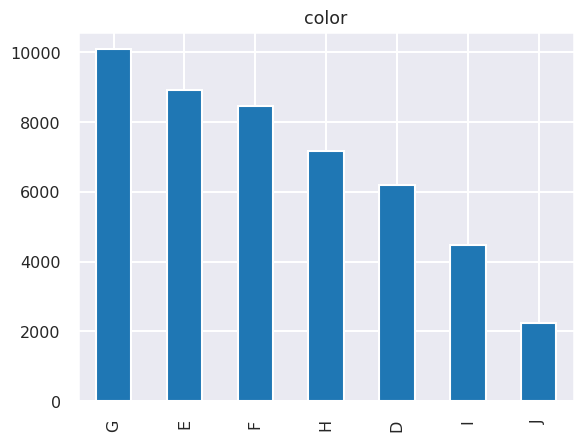

In [16]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'number of sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      number of sample  percentage
SI1              11552        24.3
VS2              10928        23.0
SI2               7402        15.6
VS1               7373        15.5
VVS2              4683         9.9
VVS1              3463         7.3
IF                1650         3.5
I1                 473         1.0


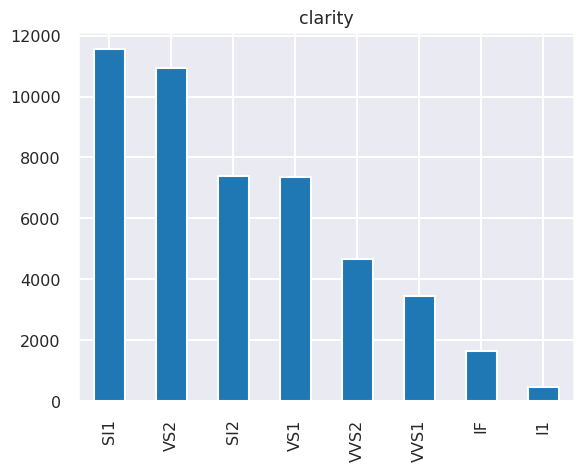

In [17]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'number of sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Numerical Features

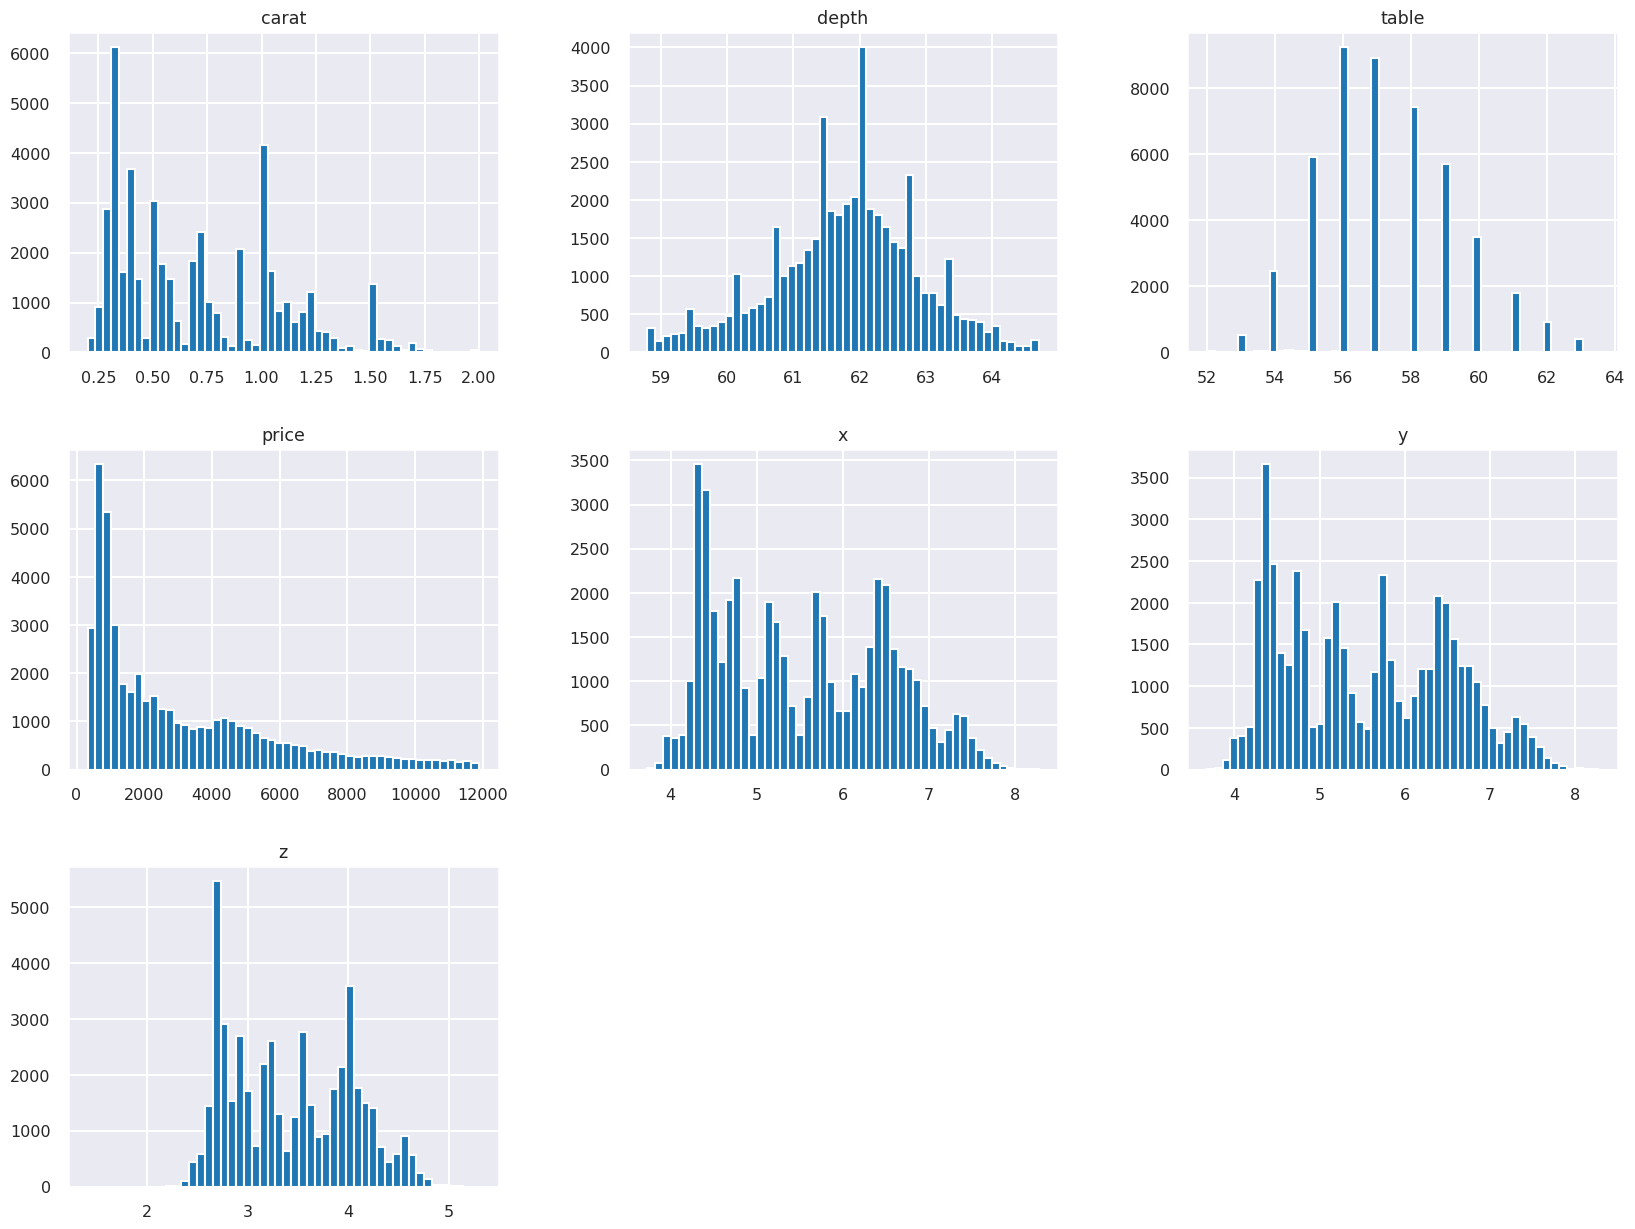

In [18]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

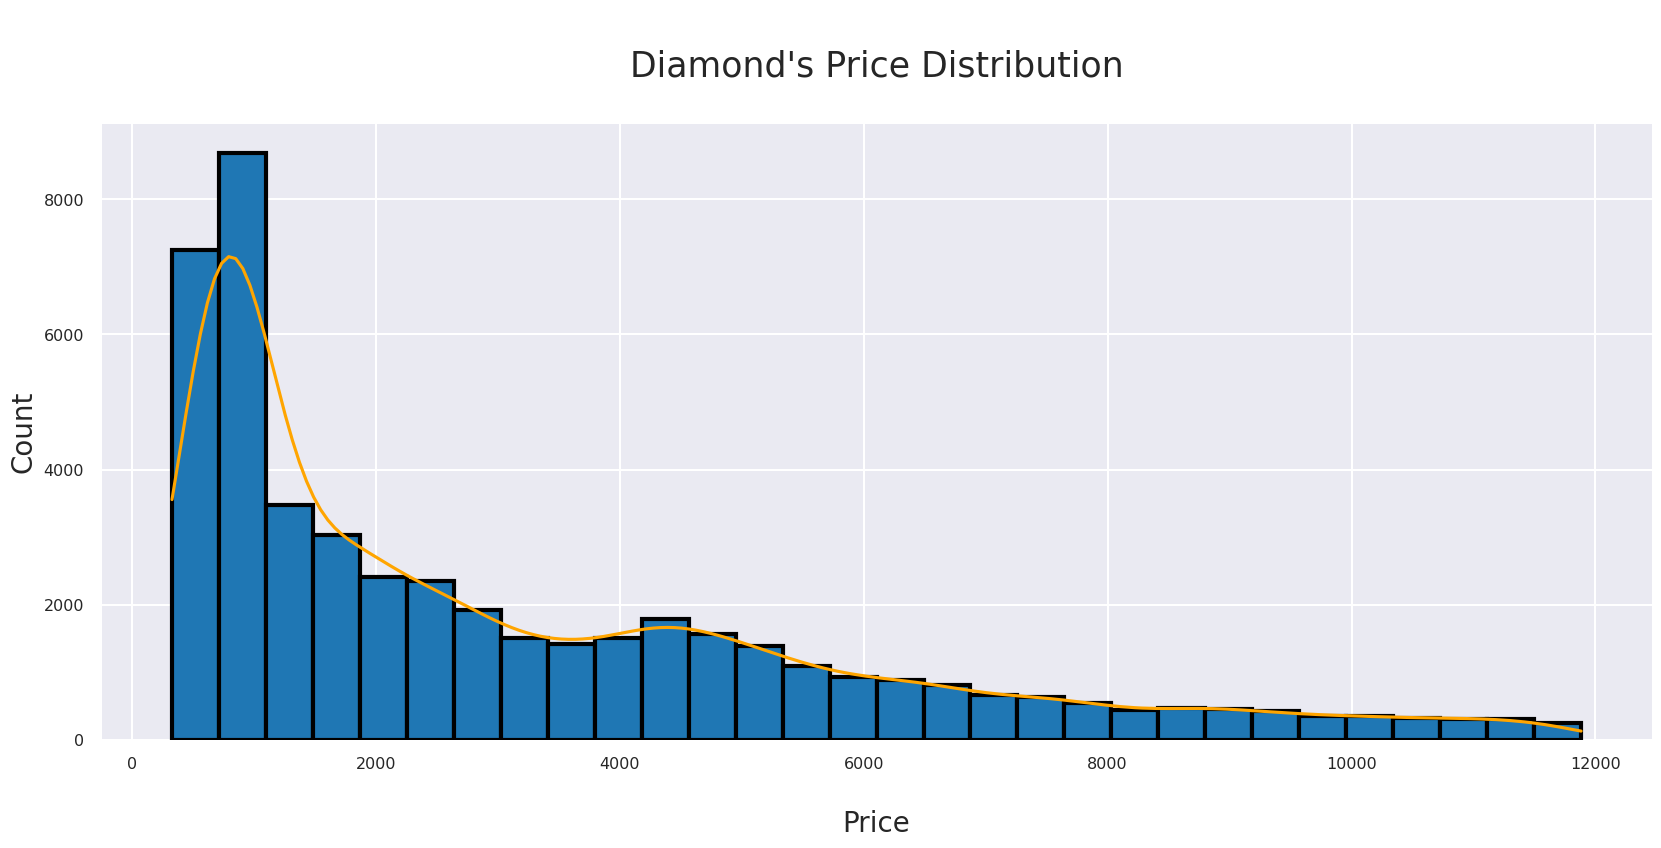

In [19]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(diamonds["price"], kde=True, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Price Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nPrice",fontsize=20)
plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

## EDA Multivariate

### Categorical Features

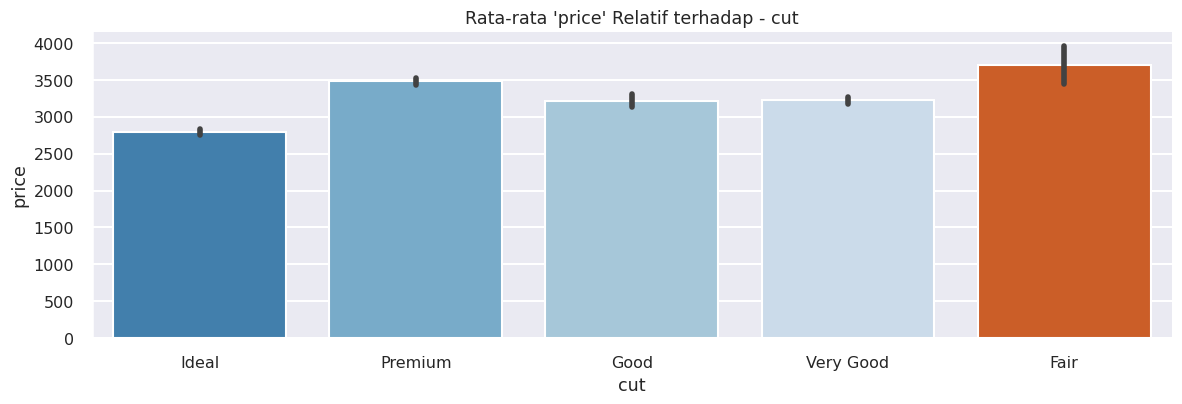

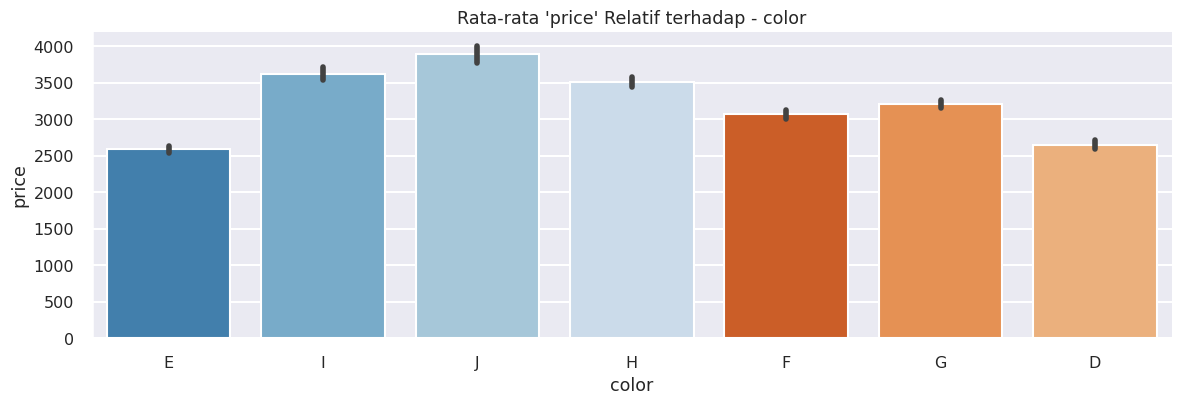

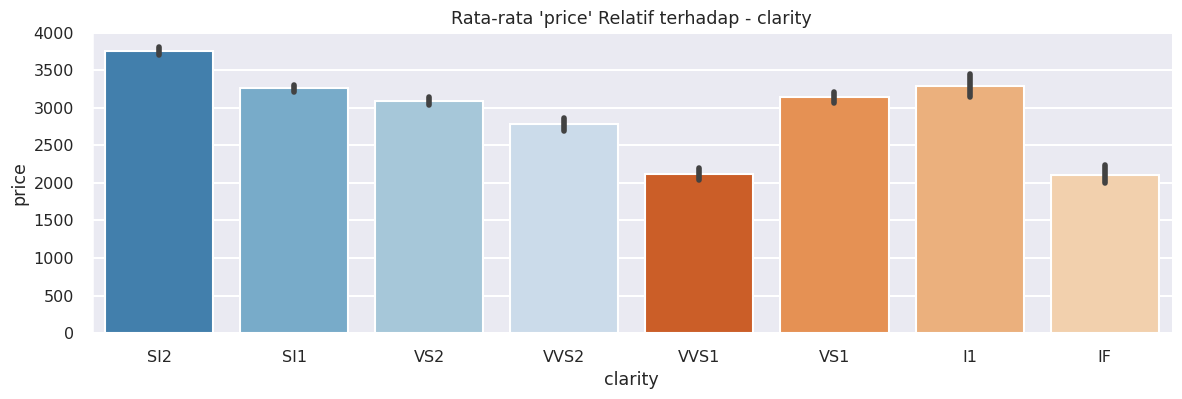

In [20]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="tab20c")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

### Numerical Features

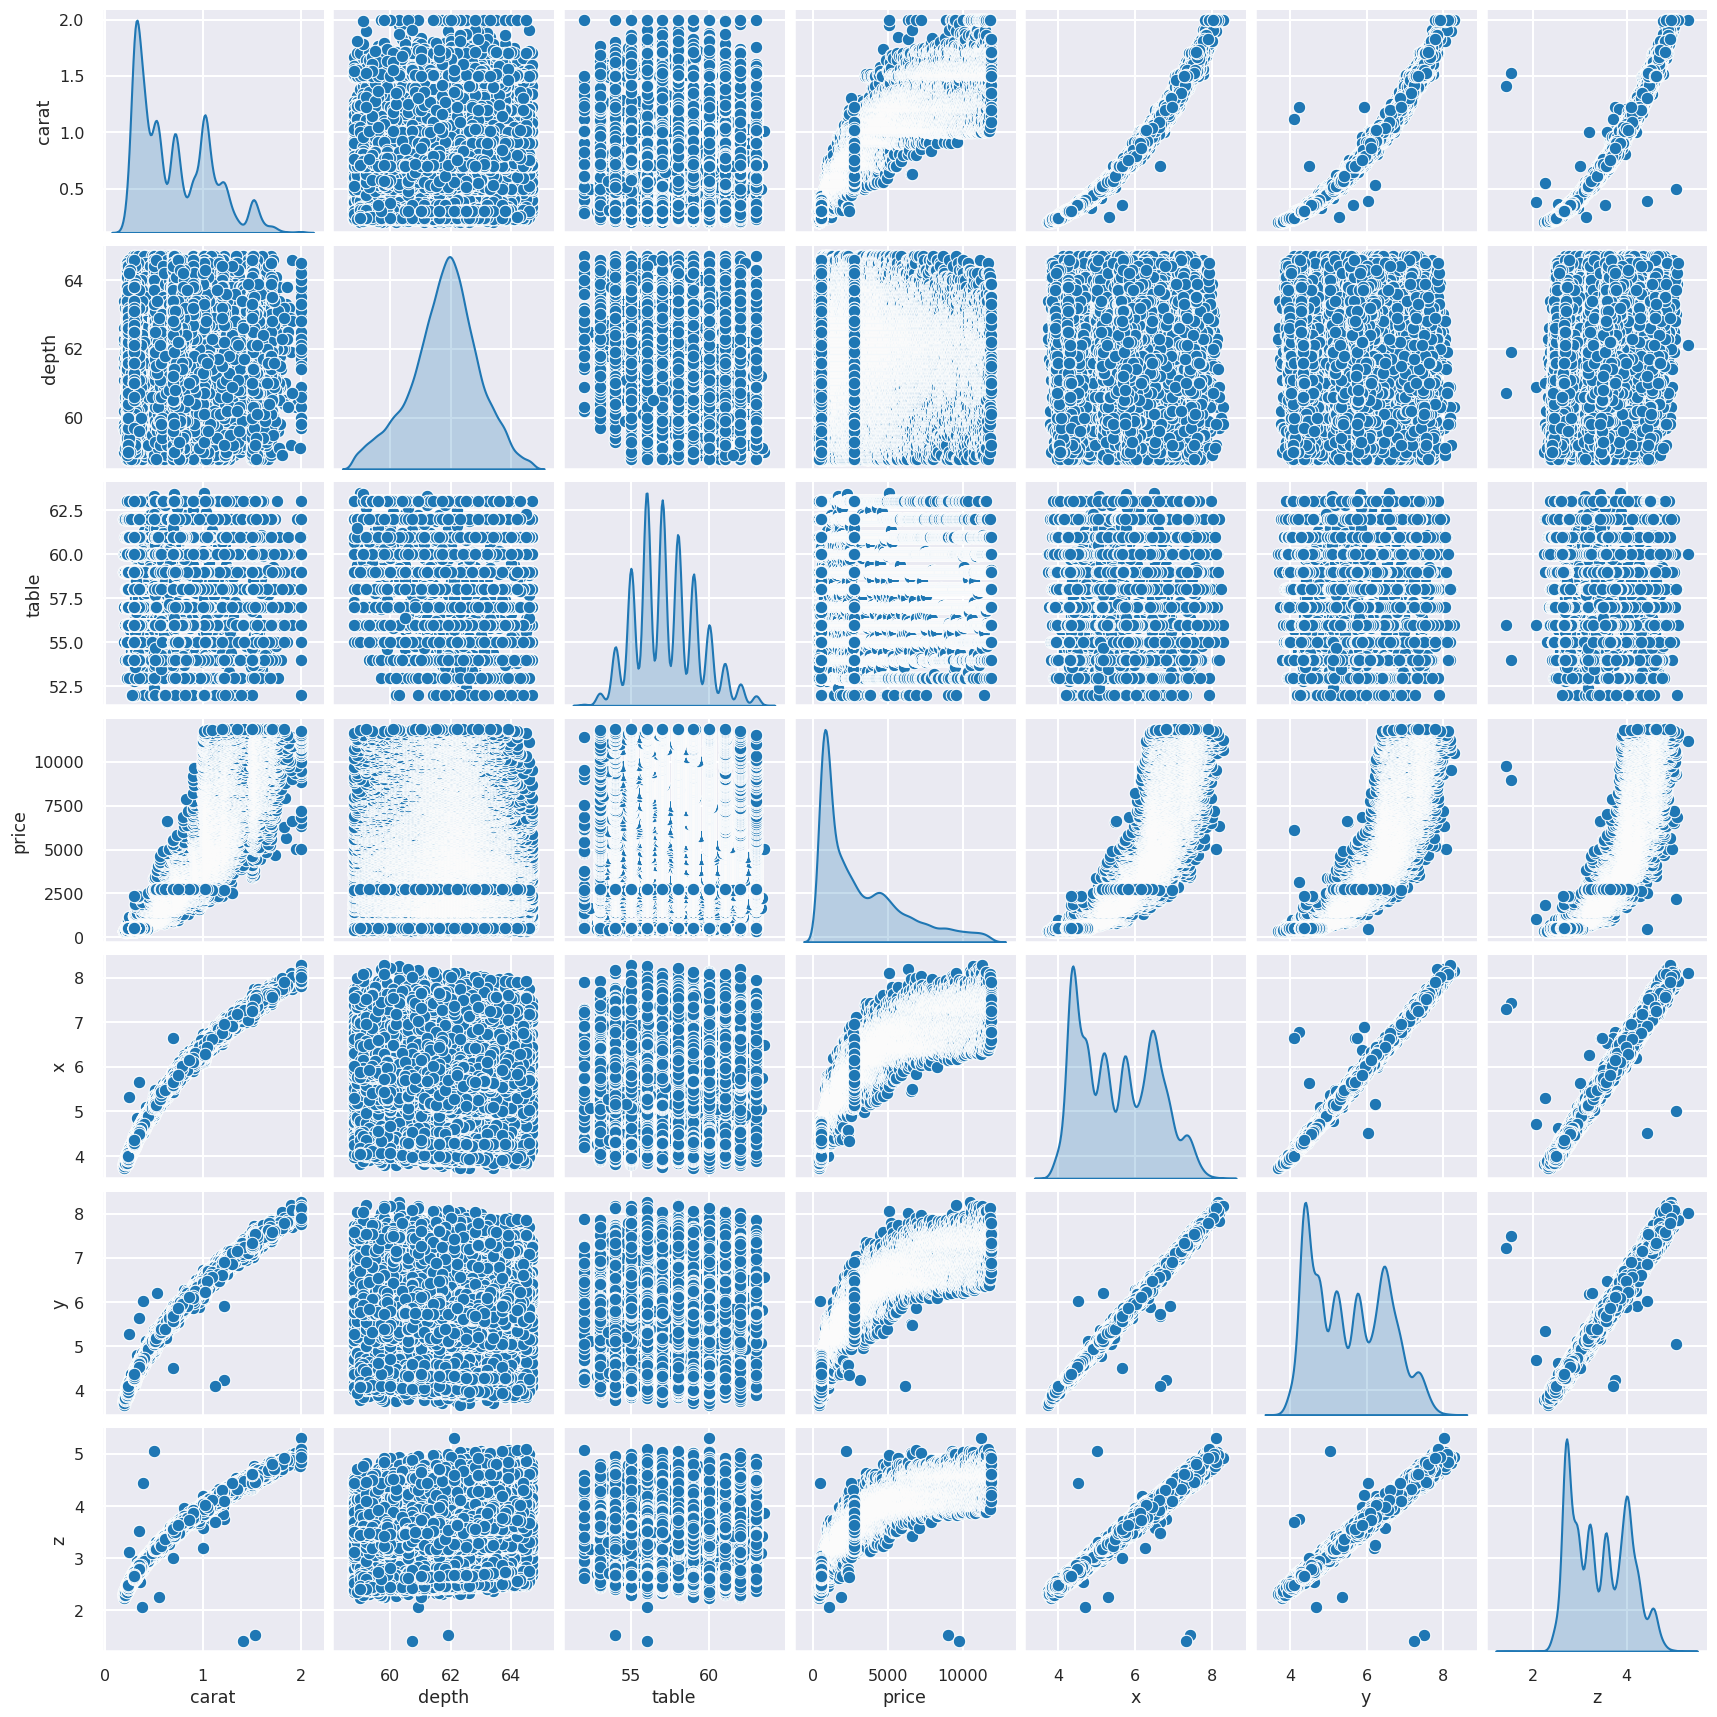

In [21]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind = 'kde')

Text(0.5, 1.0, 'Pearson Correlation on Features ')

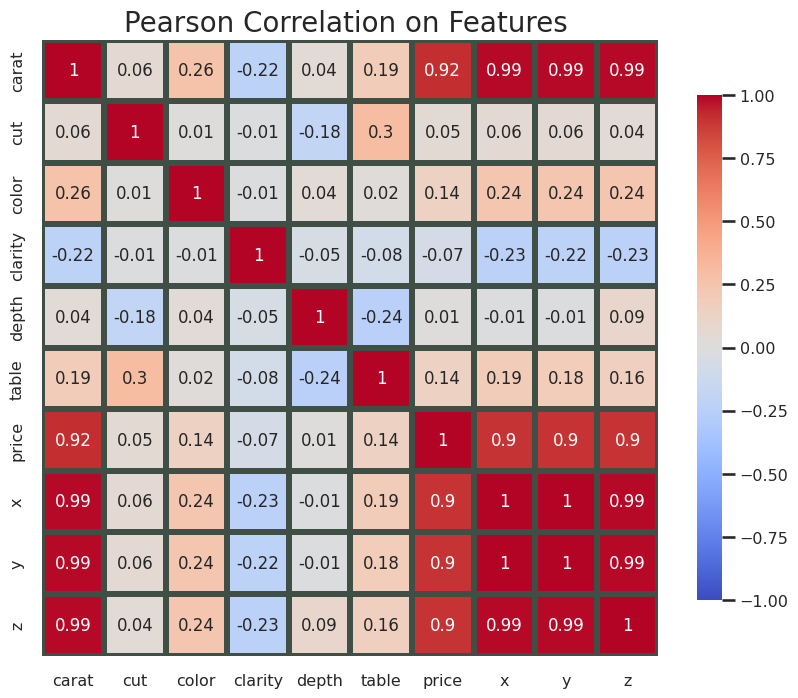

In [22]:
catcol = ["color","clarity","cut"]
le = LabelEncoder()
for col in catcol:
        diamonds[col] = le.fit_transform(diamonds[col])

plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)
# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws=dict(shrink =.82), vmin=-1, vmax=1, linewidths=3,linecolor='#3f4f45',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation on Features ", size=20)

In [23]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,2,1,3,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,57.0,336,3.94,3.96,2.48


#Data Preparation

## Encoding Fitur Kategori

In [24]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_1,cut_2,cut_3,cut_4,...,color_4,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
0,0.23,55.0,326,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


## Reduksi Dimensi dengan PCA

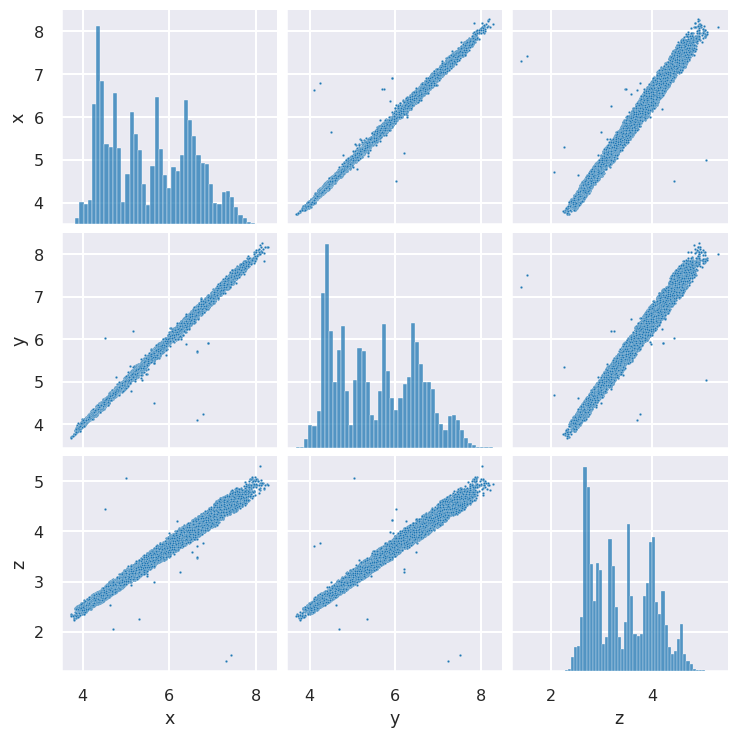

In [25]:
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

In [27]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,cut_1,cut_2,cut_3,cut_4,color_1,color_2,color_3,...,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,dimension
0,0.23,55.0,326,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,-2.451982


## Train-test-split

In [29]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [30]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


## Standarisasi

In [31]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [32]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


# Model Development dengan KNN

In [33]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'AdaBoost'])

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

# Model Develompment dengan Random Forest

In [35]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

# Model Development dengan AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','AdaBoost'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

In [37]:
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [38]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'AdaBoost': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,226.029595,257.399127
RF,59.264645,147.796052
Boosting,NaN,NaN
AdaBoost,928.043394,865.120811


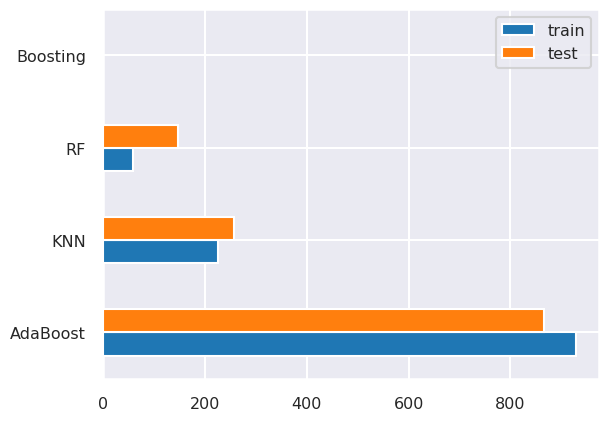

In [39]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [40]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediction of_'+name] = model.predict(prediksi).round(2)

pd.DataFrame(pred_dict)

,y_true,prediction of_KNN,prediction of_RF,prediction of_AdaBoost
35096,886,923.2,883.54,789.16
